In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
df = pd.read_csv(r"C:\Users\priya\Desktop\extra material\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\priya\AppData\Local\Temp\ipykernel_16260\1983787897.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


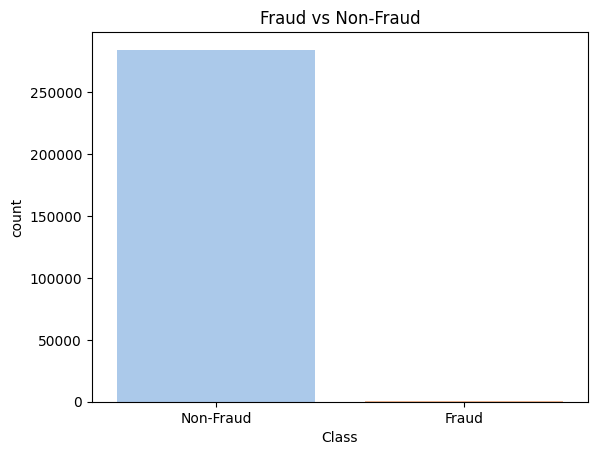

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [10]:
sns.countplot(x='Class', data=df, palette='pastel')
plt.title("Fraud vs Non-Fraud")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

print(df['Class'].value_counts(normalize=True)*100)


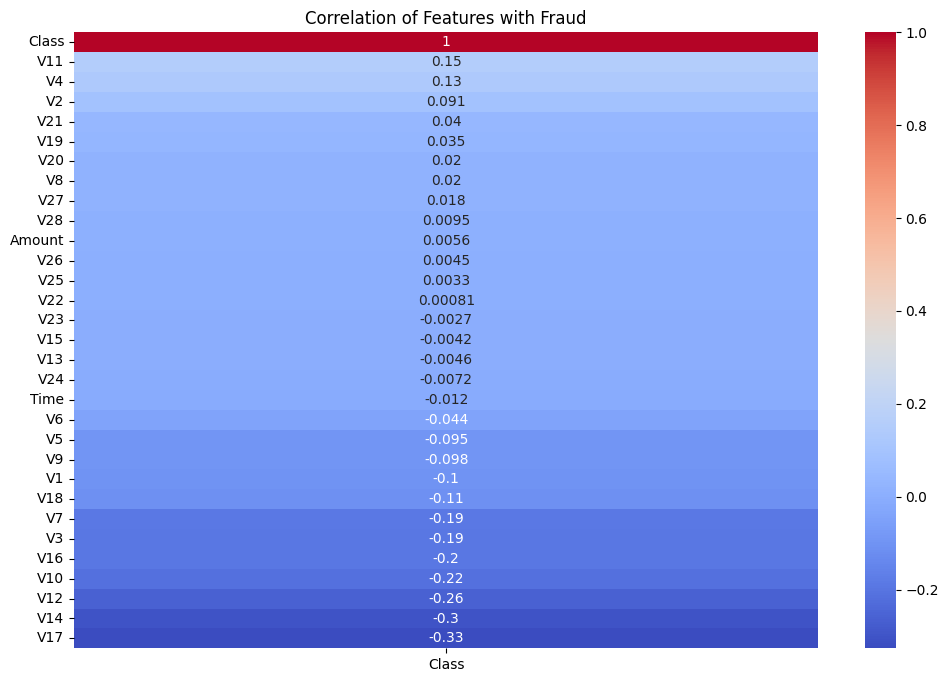

In [11]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Fraud")
plt.show()


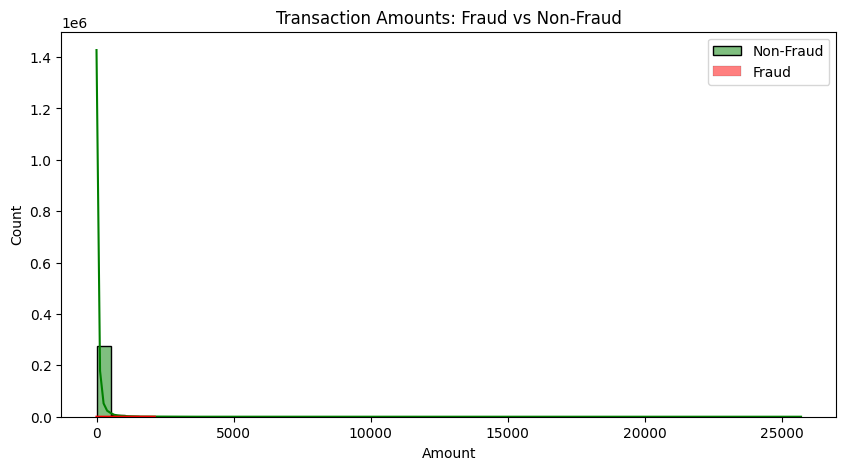

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.show()


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("🔍 Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log))


🔍 Logistic Regression Report:

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

ROC AUC Score: 0.8213142636063991


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🌲 Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


🌲 Random Forest Report:

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9412    0.8163    0.8743        98

    accuracy                         0.9996     56962
   macro avg     0.9704    0.9081    0.9371     56962
weighted avg     0.9996    0.9996    0.9996     56962

ROC AUC Score: 0.9081193007591333


In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Original class distribution:\n{y_train.value_counts()}")
print(f"SMOTE class distribution:\n{y_train_smote.value_counts()}")



Original class distribution:
Class
0    227451
1       394
Name: count, dtype: int64
SMOTE class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


In [19]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)
y_pred_log_smote = logreg.predict(X_test)

# Evaluate the performance
print("🔍 Logistic Regression (with SMOTE) Report:\n")
print(classification_report(y_test, y_pred_log_smote, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_smote))


🔍 Logistic Regression (with SMOTE) Report:

              precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC AUC Score: 0.9463636115673055


In [ ]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("🔍 Random Forest (with Class Weights) Report:\n")
print(classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


🔍 Random Forest (with Class Weights) Report:

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC Score: 0.8724226008636431


In [ ]:
logreg_pred = logreg.predict(X_test)
rf_pred = rf.predict(X_test)

final_results = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Regression_Prediction': logreg_pred,
    'Random_Forest_Prediction': rf_pred
})

print(final_results.head())


        Actual  Logistic_Regression_Prediction  Random_Forest_Prediction
263020       0                               0                         0
11378        0                               0                         0
147283       0                               0                         0
219439       0                               0                         0
36939        0                               1                         0
